In [1]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
from detectron2.config import get_cfg
from detectron2.data import get_detection_dataset_dicts, build_detection_test_loader
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
from PIL import Image

from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
import detectron2.data.detection_utils as utils
from detectron2.engine import DefaultPredictor, DefaultTrainer

from detectron2.evaluation import COCOEvaluator, inference_on_dataset

Reproduce Tutorial
----

In [2]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [ ]:
predictor.model.backbone.fpn_lateral2.weight

In [3]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = utils.read_image("./input.jpg", None)

--2020-01-22 15:56:14--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.109.163
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.109.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K  --.-KB/s    in 0.1s    

2020-01-22 15:56:14 (1.54 MB/s) - ‘input.jpg’ saved [209222/209222]



In [ ]:
im

In [4]:
outputs = predictor(im)

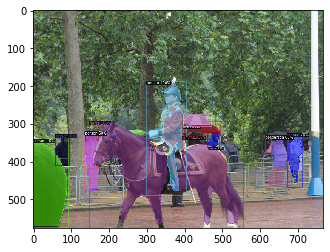

In [5]:
v = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure()
plt.imshow(v.get_image())
plt.show()

COCO
-----

In [6]:
dataset_dicts = get_detection_dataset_dicts(
        cfg.DATASETS.TRAIN,
        filter_empty=cfg.DATALOADER.FILTER_EMPTY_ANNOTATIONS,
        min_keypoints=cfg.MODEL.ROI_KEYPOINT_HEAD.MIN_KEYPOINTS_PER_IMAGE
        if cfg.MODEL.KEYPOINT_ON
        else 0,
        proposal_files=cfg.DATASETS.PROPOSAL_FILES_TRAIN if cfg.MODEL.LOAD_PROPOSALS else None,
    )

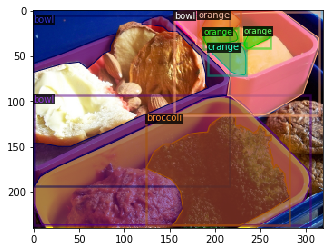

In [7]:
#Visualize GT
for i, sample in enumerate(dataset_dicts):
    im = utils.read_image(sample['file_name'], None)

    visualizer = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
    vis = visualizer.draw_dataset_dict(sample)
    plt.figure()
    plt.imshow(vis.get_image())
    plt.show()
    
    break


In [9]:
# Prediction
outputs = predictor(im)

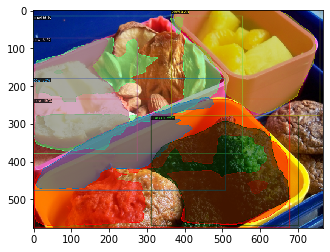

In [10]:
v = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure()
plt.imshow(v.get_image())
plt.show()

In [12]:
evaluator = COCOEvaluator("coco_2017_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "coco_2017_val")
inference_on_dataset(predictor.model, val_loader, evaluator)

[01/22 16:10:58 d2.data.datasets.coco]: Loaded 5000 images in COCO format from datasets/coco/annotations/instances_val2017.json
[01/22 16:10:58 d2.evaluation.evaluator]: Start inference on 5000 images
[01/22 16:11:00 d2.evaluation.evaluator]: Inference done 11/5000. 0.0737 s / img. ETA=0:06:57
[01/22 16:11:05 d2.evaluation.evaluator]: Inference done 68/5000. 0.0792 s / img. ETA=0:07:16
[01/22 16:11:10 d2.evaluation.evaluator]: Inference done 128/5000. 0.0771 s / img. ETA=0:07:00
[01/22 16:11:15 d2.evaluation.evaluator]: Inference done 187/5000. 0.0765 s / img. ETA=0:06:53
[01/22 16:11:20 d2.evaluation.evaluator]: Inference done 248/5000. 0.0761 s / img. ETA=0:06:44
[01/22 16:11:25 d2.evaluation.evaluator]: Inference done 307/5000. 0.0761 s / img. ETA=0:06:39
[01/22 16:11:30 d2.evaluation.evaluator]: Inference done 365/5000. 0.0761 s / img. ETA=0:06:35
[01/22 16:11:35 d2.evaluation.evaluator]: Inference done 426/5000. 0.0760 s / img. ETA=0:06:28
[01/22 16:11:40 d2.evaluation.evaluator]:

[01/22 16:17:29 d2.evaluation.evaluator]: Inference done 4517/5000. 0.0773 s / img. ETA=0:00:41
[01/22 16:17:34 d2.evaluation.evaluator]: Inference done 4576/5000. 0.0773 s / img. ETA=0:00:36
[01/22 16:17:39 d2.evaluation.evaluator]: Inference done 4635/5000. 0.0773 s / img. ETA=0:00:31
[01/22 16:17:44 d2.evaluation.evaluator]: Inference done 4694/5000. 0.0773 s / img. ETA=0:00:26
[01/22 16:17:49 d2.evaluation.evaluator]: Inference done 4753/5000. 0.0773 s / img. ETA=0:00:21
[01/22 16:17:54 d2.evaluation.evaluator]: Inference done 4810/5000. 0.0773 s / img. ETA=0:00:16
[01/22 16:17:59 d2.evaluation.evaluator]: Inference done 4870/5000. 0.0773 s / img. ETA=0:00:11
[01/22 16:18:04 d2.evaluation.evaluator]: Inference done 4928/5000. 0.0773 s / img. ETA=0:00:06
[01/22 16:18:09 d2.evaluation.evaluator]: Inference done 4986/5000. 0.0774 s / img. ETA=0:00:01
[01/22 16:18:11 d2.evaluation.evaluator]: Total inference time: 0:07:11.046821 (0.086296 s / img per device, on 1 devices)
[01/22 16:18:

OrderedDict([('bbox',
              {'AP': 37.45999238918093,
               'AP50': 54.5671573653508,
               'AP75': 41.85607610611001,
               'APs': 19.952259406238237,
               'APm': 40.36791325400338,
               'APl': 50.87100460677046,
               'AP-person': 52.1202699529836,
               'AP-bicycle': 27.31534736208186,
               'AP-car': 41.70889582273138,
               'AP-motorcycle': 38.85764489805458,
               'AP-airplane': 60.326406532074074,
               'AP-bus': 60.841291178176085,
               'AP-train': 58.35175489535671,
               'AP-truck': 28.619620296330094,
               'AP-boat': 23.538024294021298,
               'AP-traffic light': 24.73908085209478,
               'AP-fire hydrant': 63.26708158273766,
               'AP-stop sign': 62.213534000930196,
               'AP-parking meter': 41.900914566992675,
               'AP-bench': 21.51834359018652,
               'AP-bird': 32.35731670333031,
    

SUNRGBD RGB-Only
----

In [ ]:
cfg = get_cfg()
cfg.merge_from_file('configs/COCO-InstanceSegmentation/RGBD_mask_rcnn_R_50_FPN_3x_sunrgbd.yaml')
cfg.DATALOADER.NUM_WORKERS = 1

for d in ["train", "val"]:
    register_coco_instances("sunrgbd_{}".format(d), {}, "datasets/SUNRGBD/annotations/instances_{}.json".format(d), "datasets/SUNRGBD/images/", "datasets/SUNRGBD/images/")


In [ ]:
dataset_dicts = get_detection_dataset_dicts(
        cfg.DATASETS.TRAIN,
        filter_empty=cfg.DATALOADER.FILTER_EMPTY_ANNOTATIONS,
        min_keypoints=cfg.MODEL.ROI_KEYPOINT_HEAD.MIN_KEYPOINTS_PER_IMAGE
        if cfg.MODEL.KEYPOINT_ON
        else 0,
        proposal_files=cfg.DATASETS.PROPOSAL_FILES_TRAIN if cfg.MODEL.LOAD_PROPOSALS else None,
    )

In [ ]:
#Visualize GT
for i, sample in enumerate(dataset_dicts):
    im = utils.read_image(sample['file_name'], None)

    visualizer = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
    vis = visualizer.draw_dataset_dict(sample)
    plt.figure()
    plt.imshow(vis.get_image())
    plt.show()
    
    break


In [ ]:
# Prediction
outputs = predictor(im['image'])

In [ ]:
v = Visualizer(im['image'], MetadataCatalog.get('coco_2017_train'), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure()
plt.imshow(v.get_image())
plt.show()

SUNRGBD With Depth
-----

In [13]:
cfg = get_cfg()
cfg.merge_from_file('configs/COCO-InstanceSegmentation/RGBD_mask_rcnn_R_50_FPN_3x_sunrgbd.yaml')

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

for d in ["train", "val"]:
    register_coco_instances("sunrgbd_{}".format(d), {}, "datasets/SUNRGBD/annotations/instances_{}_annotation.json".format(d), "datasets/SUNRGBD/images/", "datasets/SUNRGBD/images/")


In [14]:
dataset_dicts = get_detection_dataset_dicts(
        cfg.DATASETS.TRAIN,
        filter_empty=cfg.DATALOADER.FILTER_EMPTY_ANNOTATIONS,
        min_keypoints=cfg.MODEL.ROI_KEYPOINT_HEAD.MIN_KEYPOINTS_PER_IMAGE
        if cfg.MODEL.KEYPOINT_ON
        else 0,
        proposal_files=cfg.DATASETS.PROPOSAL_FILES_TRAIN if cfg.MODEL.LOAD_PROPOSALS else None,
    )

WARNING [01/22 16:47:07 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/22 16:47:07 d2.data.datasets.coco]: Loaded 1115 images in COCO format from datasets/SUNRGBD/annotations/instances_train_annotation.json
[01/22 16:47:07 d2.data.build]: Removed 0 images with no usable annotations. 1115 images left.
[01/22 16:47:07 d2.data.build]: Distribution of instances among all 38 categories:
|  category  | #instances   |   category    | #instances   |  category   | #instances   |
|:----------:|:-------------|:-------------:|:-------------|:-----------:|:-------------|
|  unknown   | 7955         |     wall      | 2896         |    floor    | 1754         |
|  cabinet   | 389          |      bed      | 358          |    chair    | 3002         |
|    sofa    | 319          |     table     | 1238         |    door     | 546          |
|   window   | 791          |   bookshelf   | 70           |   picture   | 326          |
|  c

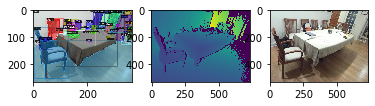

In [15]:
#Visualize GT
for i, sample in enumerate(dataset_dicts):
    im = utils.read_image(sample['file_name'], sample['depth_file_name'], use_depth=True)

    visualizer = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
    vis = visualizer.draw_dataset_dict(sample)
    plt.figure()
    plt.subplot(131)
    plt.imshow(vis.get_image())
    plt.subplot(132)
    plt.imshow(im['depth'])
    plt.subplot(133)
    plt.imshow(im['image'])
    plt.show()
    
    break

In [16]:
# Prediction
outputs = predictor(im)

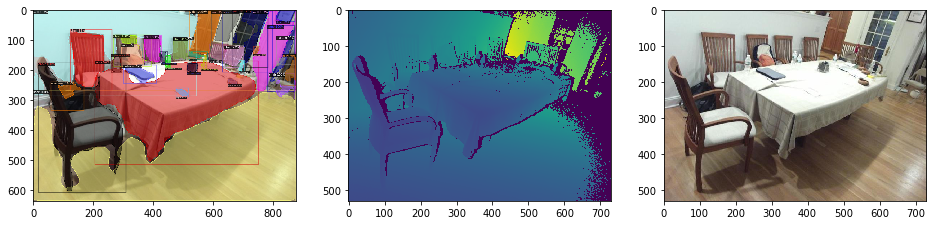

In [17]:
v = Visualizer(im['image'], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(v.get_image())
plt.subplot(132)
plt.imshow(im['depth'])
plt.subplot(133)
plt.imshow(im['image'])
plt.show()

In [ ]:
plt.figure(figsize=(16, 16))
plt.imshow(v.get_image())
plt.show()

In [ ]:
plt.figure(figsize=(16, 16))
plt.imshow(im['image'])
plt.show()

In [18]:
evaluator = COCOEvaluator("sunrgbd_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "sunrgbd_val")
inference_on_dataset(predictor.model, val_loader, evaluator)

WARNING [01/22 16:47:43 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/22 16:47:43 d2.data.datasets.coco]: Loaded 659 images in COCO format from datasets/SUNRGBD/annotations/instances_val_annotation.json
[01/22 16:47:43 d2.data.build]: Distribution of instances among all 38 categories:
|  category  | #instances   |   category    | #instances   |  category   | #instances   |
|:----------:|:-------------|:-------------:|:-------------|:-----------:|:-------------|
|  unknown   | 5896         |     wall      | 1586         |    floor    | 1344         |
|  cabinet   | 253          |      bed      | 426          |    chair    | 2456         |
|    sofa    | 413          |     table     | 965          |    door     | 150          |
|   window   | 248          |   bookshelf   | 43           |   picture   | 285          |
|  counter   | 97           |    blinds     | 13           |    desk     | 237          |
|  shelves  

OrderedDict([('bbox',
              {'AP': 3.5140779698398994,
               'AP50': 6.898368265188928,
               'AP75': 3.146257504326106,
               'APs': 0.12139679341945234,
               'APm': 1.7755928215750294,
               'APl': 5.448211528258899,
               'AP-unknown': 3.1392050549251387,
               'AP-wall': 6.673906486519184,
               'AP-floor': 15.976965755279714,
               'AP-cabinet': 0.1685525695426685,
               'AP-bed': 11.783466146199524,
               'AP-chair': 7.176307494346132,
               'AP-sofa': 6.121441032618529,
               'AP-table': 8.3256503772613,
               'AP-door': 0.5572387039752569,
               'AP-window': 2.36687943619302,
               'AP-bookshelf': 1.763939551849922,
               'AP-picture': 4.504968516569893,
               'AP-counter': 1.254125412541254,
               'AP-blinds': 0.0,
               'AP-desk': 1.1636446818630028,
               'AP-shelves': 0.0,
      